# Lab: Gradient Descent and Stochastic Gradient Descent

Import first all these librairies   

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for nicer plots

In this lab, we aim to apply GD and SGD to some particular functions

## I. Application on a one-dimensional case

We fist start with applying GD to the one-dimensional function: 
$$
f_1: w \mapsto w^2 -w/2+1- \log[1+\exp(w/2+1)].
$$


Q1. First plot this function on $[-1,1]$.

In [3]:
def f_1(x): 
    return x ** 2 - x / 2 + 1 - np.log(1 + np.exp(x / 2 + 1))

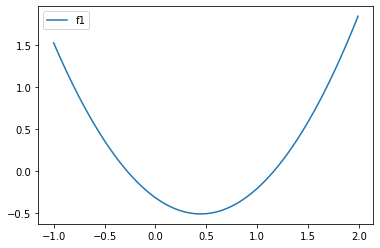

In [4]:
w = np.arange(-1, 2, 0.01)
plt.plot(w, f_1(w), label='f1')
plt.legend();

Q2. Compute the derivative of $f_1$ and implement this  function.

In [5]:
def f_1_derivate(w): 
    return 2 * w - 1 / 2 - (1 / 2 * (np.exp(w / 2 + 1))) \
    /(1 + np.exp(w / 2 + 1))

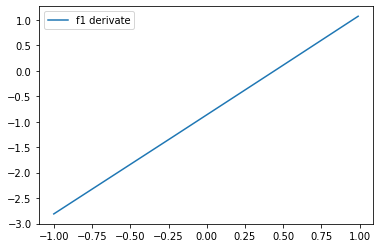

In [6]:
w = np.arange(-1, 1, 0.01)
plt.plot(w, f_1_derivate(w), label='f1 derivate')
plt.legend();

Q3. Is $f_1$ convex? 

Yes because the derivate of f1 is strictly increasing and the second derivative is stricly positive

Q4. We aim to apply GD to $f_1$. Implement a function which takes as input 
- the derivative of the function to minimize
- an initial condition
- a stepsize/learning rate 
- a number of iterations

and ouputs

- the list of iterates of GD
- the list of the evaluations of the derivative of the function at the iterates

In [7]:
def gradient_descent_1(derivate, init_cond, stepsize, n_it):
    GD = [init_cond]
    derivate_list = [derivate(GD[0])]
    
    for i in range(n_it-1):
        derivate_list.append(derivate(GD[i]))
        GD.append(GD[i] - stepsize * derivate_list[i])
    return GD, derivate_list

Q5. Apply GD to $f_1$ and plot the iterates and the functions at the iterates.

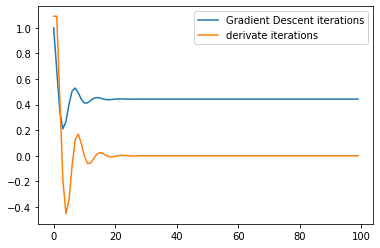

In [8]:
x = 1
n_it = 100
step = 0.3

GD, derivate = gradient_descent_1(f_1_derivate, x, step, n_it)

plt.plot(range(n_it), GD, label='Gradient Descent iterations')
plt.plot(range(n_it), derivate, label='derivate iterations')
plt.legend();

Q6. (Optional) Estimate the rate of convergence of GD for $f_1$. To this end, only 100 hundred iterations are sufficient starting from $1$.

We now consider the one-dimensional function: 
$$
f_2 : w \mapsto w^2 + \cos(2\pi w) -\log(1+4 w^2) +w.
$$
Q7. First plot this function on $[-3,3]$.

In [9]:
def f_2(w):
    return w ** 2 + np.cos(np.pi * 2 * w) - np.log(1 + 4 * w ** 4) + w

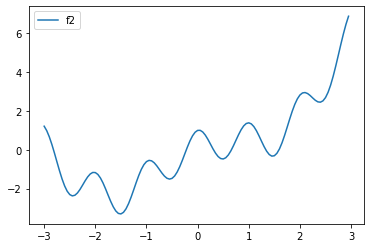

In [10]:
w = np.arange(-3, 3, 0.05)
plt.plot(w, f_2(w), label='f2')
plt.legend();

Q8. Is this function is convex?

No

Q9. Apply GD using different initialization and plot the evaluation of $f_2$ at the resulting iterates.

In [11]:
def f_2_derivate(w):
    return 2 * w - 2 * np.pi * np.sin(np.pi * 2 * w) - (16 * w ** 3) / (1 + 4 * w ** 4) + 1

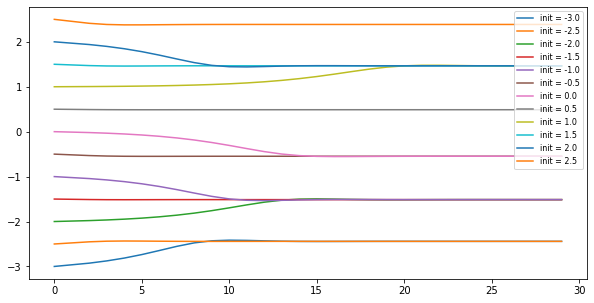

In [12]:
x = np.arange(-3,3, 0.5)
n_it = 30
step = 0.01

plt.figure(figsize=[10,5])
for cond_init in x:
    GD , derivate = gradient_descent_1(f_2_derivate, cond_init, step, n_it)
    plt.plot(range(n_it), GD, label=f'init = {cond_init}')
    #plt.plot(range(n_it), derivate, linestyle=':')
    plt.legend(fontsize=8);

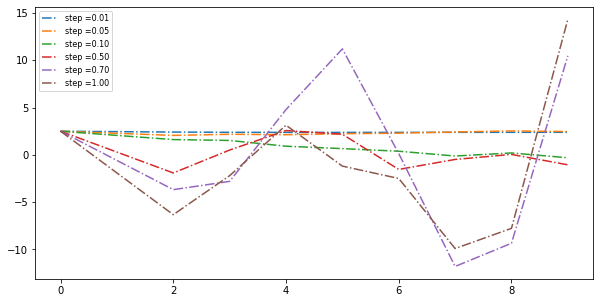

In [13]:
x = -1
n_it = 10
step_list = [0.01, 0.05, 0.1, 0.5, 0.7, 1]

plt.figure(figsize=[10,5])
for step in step_list:
    GD , derivate = gradient_descent_1(f_2_derivate, cond_init, step, n_it)
    plt.plot(range(n_it), GD, label=f'step ={step:.2f}', linestyle='-.')
    plt.legend(fontsize=8);

## II. Application on the Rosenbrock function

In this part, we consider the function
$$
f_3 : w \mapsto (w_1-1)^2 + 100(w_1^2-w_2)^2 \, ,
$$
called the Rosenbrock function.

Q10. Plot the contour lines of this function.

In [14]:
def rosenbrock(w):
    return (w[0]-1)**2 + 100*(w[0]**2 - w[1])**2

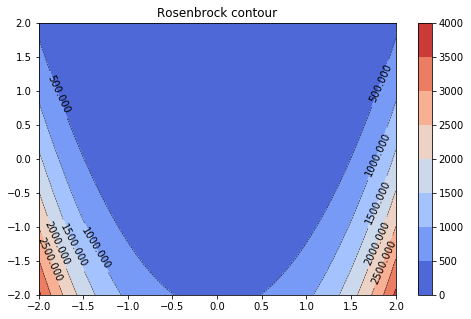

In [15]:
xlist = np.linspace(-2.0, 2.0, 100)
ylist = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(xlist, ylist)

fig,ax=plt.subplots(figsize=[8,5])
cs = ax.contour(X, Y, rosenbrock((X, Y)),  colors='black', linestyles='dashed', linewidths=0.5)

plt.clabel(cs, inline=1, fontsize=10, colors='black')

cp = ax.contourf(X, Y, rosenbrock((X,Y)) , cmap='coolwarm')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Rosenbrock contour')
plt.show()

Q11. Is $f_3$ admits a unique minimizer? If so find it.

f convex et bounded on a compact convex
$$
f_3 : w \mapsto (w_1-1)^2 + 100(w_1^2-w_2)^2 \\
$$
$\frac{f_3}{\delta w_1} (w)= 2 (w_1-1) + 400w_1(w_1^2-w_2) $

$\frac{f_3}{\delta w_2} (w)= -200(w_1^2-w_2) $

$ Hess (f_3)(w) = \begin{bmatrix}
2 + 1200w_1^2 -400w_2 & -400w_1 \\
-400w_1  & 200
\end{bmatrix} $


critical points : 
$ \left\{
    \begin{array}{ll}
        \frac{f_3}{\delta w_1} = 2 (w_1-1) + 400w_1(w_1^2-w_2) = 0 \\
        \frac{f_3}{\delta w_2} = -200(w_1^2-w_2) = 0
    \end{array}
\right.$

for $w_1 = w_2 = 1$

then the hessian is : $ Hess (f_3)(1,1) = \begin{bmatrix}802 & -400 \\-400  & 200 \end{bmatrix}  = 2 \begin{bmatrix}401 & -200 \\-200  & 100 \end{bmatrix}$

In [16]:
Hess_eigenvalues = np.linalg.eigvals([[401,-200],[-200,100]])
print(f'The eigenvalues of the Hessian matrix are : {Hess_eigenvalues}') 
if np.all(Hess_eigenvalues>0): print('The matrix is definite positive therefore the critical point is a local minimizer')
else: print('The matrix is not definite positive therefore the critical point is not a local minimizer')

The eigenvalues of the Hessian matrix are : [5.00800320e+02 1.99680384e-01]
The matrix is definite positive therefore the critical point is a local minimizer


therefore the critical point, (1,1) is a local minimizer 

Q12. Apply GD to $f_3$ for different choice of learning rates and starting from $w_0 = (-1,1)$. Comment your results.

In [17]:
def f_3_derivate(w):
    f_w_1 = 2 * (w[0] - 1) + 400 * w[0] * (w[0] ** 2 - w[1])
    f_w_2 =  - 200 * (w[0] ** 2 - w[1])
    return [f_w_1, f_w_2]

In [18]:
def gradient_descent_2(gradient, w, stepsize, n_it):
    GD = [w]
    derivate_list = []
    
    for i in range(n_it - 1):
        derivate_list.append(gradient(GD[i]))
        descent = [(- step) * derivate for derivate in derivate_list[i]]
        GD.append(np.add(GD[i], descent))
        
    return GD, derivate_list

In [22]:
w = [-1, 0]
step = 0.001
n_it = 100

GD, descent = gradient_descent_2(f_3_derivate, w, step, n_it)

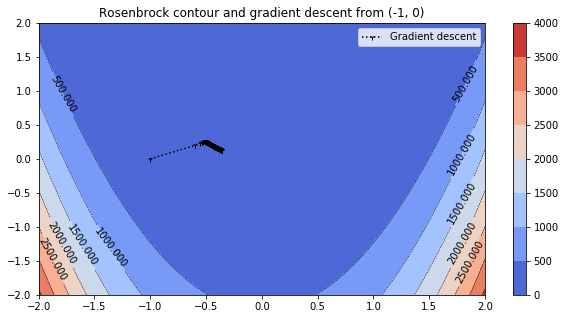

In [23]:
w_1 = [GD[i][0] for i in range(len(GD))]
w_2 = [GD[i][1] for i in range(len(GD))]

xlist = np.linspace(-2.0, 2.0, 100)
ylist = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(xlist, ylist)

fig, ax = plt.subplots(figsize=[10,5])
CS = ax.contourf(X, Y, rosenbrock((X, Y)), cmap='coolwarm')
plt.plot(w_1, w_2, c='black', linestyle=':', label='Gradient descent', marker='1')
cs = ax.contour(X, Y, rosenbrock((X, Y)),  colors='black', linestyles='dashed', linewidths=0.5)
plt.clabel(cs, inline=1, fontsize=10, colors='black')
cp = ax.contourf(X, Y, rosenbrock((X,Y)) , cmap='coolwarm')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Rosenbrock contour and gradient descent from (-1, 0)')
plt.legend();

# III. Stochastic Gradient Descent for regression

Here we consider the regression problem:
$$
Y = w_0 + w_1 X + \epsilon \, , \, \epsilon \sim \mathrm{N}(0,1) \, .
$$
Therefore, we have to minimize a function $E$ of the form
$$
E(w) = \sum_{i=1}^N E_i(w) \, ,
$$
where $N$ is the number of datapoints and $E_i$ is a function of the $i$-th datapoint.

Q13. Generate some synthetic data. Plot the training data and the regression line.

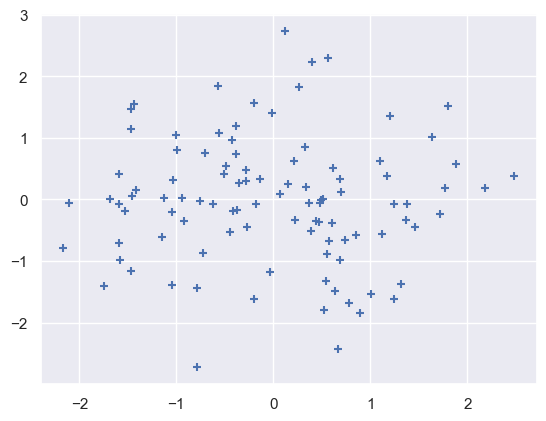

In [142]:
N = 100
X = np.random.randn(2, N)
plt.scatter(X[0], X[1], marker='+');

Q.14 Use GD to estimate the regression line.

Q15 Estimate the convergence rate of the gradient descent algorithm.

Q14 Apply random batch SGD for this regression problem:
$$
w_{n+1} = w_n - \eta \nabla E_{I_{n+1}}(w_n) \, ,
$$
where $(I_n)_n$ is a sequence of iid random variables uniform on $\{1,\ldots,N\}$.

Q15. Show that the SGD iterates do not converge.

Q16. (Optional) Show that when the SGD iterates seem to be stabilize, they stay in a neighborhood with length which decreases linearly with the learning rate.